In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Emp_Productivity_raw = pd.read_csv("C:\\ksr\\data science\\DS_batch1\\datasets\\Emp_Productivity.csv")
Emp_Productivity_raw.shape

(119, 4)

In [2]:
Emp_Productivity_raw.head()

Age  Experience  Productivity  Sample_Set
0  20.0         2.3             0           1
1  16.2         2.2             0           1
2  20.2         1.8             0           1
3  18.8         1.4             0           1
4  18.9         3.2             0           1

In [3]:
Emp_Productivity_raw["Sample_Set"].value_counts()

3    45
2    41
1    33
Name: Sample_Set, dtype: int64

In [4]:

####Filter the data and take a subset from above dataset . Filter condition is Sample_Set<3
Emp_Productivity1=Emp_Productivity_raw[Emp_Productivity_raw.Sample_Set<3]

In [5]:
Emp_Productivity1.shape

(74, 4)

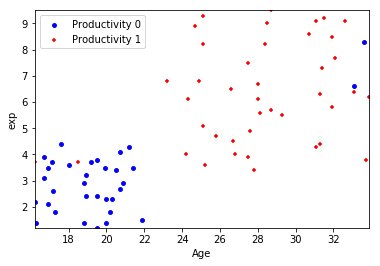

In [11]:

####The clasification graph
#Draw a scatter plot that shows Age on X axis and Experience on Y-axis. Try to distinguish the two classes with colors or shapes.
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Emp_Productivity1.Age[Emp_Productivity1.Productivity==0],Emp_Productivity1.Experience[Emp_Productivity1.Productivity==0], s=15, c='b', marker="o", label='Productivity 0')
ax1.scatter(Emp_Productivity1.Age[Emp_Productivity1.Productivity==1],Emp_Productivity1.Experience[Emp_Productivity1.Productivity==1], s=15, c='r', marker="+", label='Productivity 1')

plt.xlim(min(Emp_Productivity1.Age), max(Emp_Productivity1.Age))
plt.ylim(min(Emp_Productivity1.Experience), max(Emp_Productivity1.Experience))
plt.legend(loc='best');
plt.xlabel("Age")
plt.ylabel("exp")
plt.show()

In [12]:
import statsmodels.formula.api as sm
model1 = sm.logit(formula='Productivity ~ Age+Experience', data=Emp_Productivity1)
fitted1 = model1.fit()
fitted1.summary2()

Optimization terminated successfully.
         Current function value: 0.315987
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.540     
Dependent Variable: Productivity     AIC:              52.7661   
Date:               2019-09-09 07:45 BIC:              59.6783   
No. Observations:   74               Log-Likelihood:   -23.383   
Df Model:           2                LL-Null:          -50.860   
Df Residuals:       71               LLR p-value:      1.1670e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
Intercept    -8.9361    2.0613  -4.3351  0.0000  -12.9763  -4.8960
Age           0.2763    0.1054   2.6201  0.0088    0.0696   0.4829
Experience    0.5923    0.2979   1.9882  0.0468    0.0084   1.1763
=================================================================

"""

In [13]:
fitted1.params

Intercept    -8.936111
Age           0.276275
Experience    0.592344
dtype: float64

In [14]:
# equation :
#-8.9361+0.2763*Age+0.5923*Experience

In [15]:
Emp_Productivity1["pred_prob"]=fitted1.predict()

C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
Emp_Productivity1.head()

Age  Experience  Productivity  Sample_Set  pred_prob
0  20.0         2.3             0           1   0.114232
1  16.2         2.2             0           1   0.040805
2  20.2         1.8             0           1   0.092027
3  18.8         1.4             0           1   0.051521
4  18.9         3.2             0           1   0.139552

In [17]:
Emp_Productivity1["pred"]=np.where(Emp_Productivity1["pred_prob"]>=0.5,1,0)

C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
Emp_Productivity1["pred"].value_counts()

1    41
0    33
Name: pred, dtype: int64

In [19]:
Emp_Productivity1.columns

Index(['Age', 'Experience', 'Productivity', 'Sample_Set', 'pred_prob', 'pred'], dtype='object')

In [20]:
from sklearn.metrics import  accuracy_score
accuracy_score(Emp_Productivity1["Productivity"],Emp_Productivity1["pred"])

0.9459459459459459

In [23]:
fitted1.params

Intercept    -8.936111
Age           0.276275
Experience    0.592344
dtype: float64

In [25]:
fitted1.params[2]

0.5923444224048654

In [26]:
# coefficients
slope1=fitted1.params[1]/(-fitted1.params[2])
intercept1=fitted1.params[0]/(-fitted1.params[2])


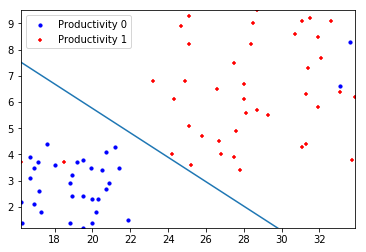

In [27]:

#Finally draw the decision boundary for this logistic regression model
      
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Emp_Productivity1.Age[Emp_Productivity1.Productivity==0],Emp_Productivity1.Experience[Emp_Productivity1.Productivity==0], s=10, c='b', marker="o", label='Productivity 0')
ax1.scatter(Emp_Productivity1.Age[Emp_Productivity1.Productivity==1],Emp_Productivity1.Experience[Emp_Productivity1.Productivity==1], s=10, c='r', marker="+", label='Productivity 1')

plt.xlim(min(Emp_Productivity1.Age), max(Emp_Productivity1.Age))
plt.ylim(min(Emp_Productivity1.Experience), max(Emp_Productivity1.Experience))
plt.legend(loc='upper left');

x_min, x_max = ax1.get_xlim()
ax1.plot([0, x_max], [intercept1, x_max*slope1+intercept1])
plt.show()

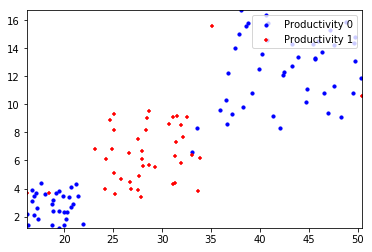

In [28]:

#plotting the overall data
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Emp_Productivity_raw.Age[Emp_Productivity_raw.Productivity==0],Emp_Productivity_raw.Experience[Emp_Productivity_raw.Productivity==0], s=10, c='b', marker="o", label='Productivity 0')
ax.scatter(Emp_Productivity_raw.Age[Emp_Productivity_raw.Productivity==1],Emp_Productivity_raw.Experience[Emp_Productivity_raw.Productivity==1], s=10, c='r', marker="+", label='Productivity 1')

plt.xlim(min(Emp_Productivity_raw.Age), max(Emp_Productivity_raw.Age))
plt.ylim(min(Emp_Productivity_raw.Experience), max(Emp_Productivity_raw.Experience))
plt.legend(loc='upper right');
 plt.show()

In [29]:
###Logistic Regerssion model1
import statsmodels.formula.api as sm
model = sm.logit(formula='Productivity ~ Age+Experience', data=Emp_Productivity_raw)
fitted = model.fit()
fitted.summary2()

# getting slope and intercept of the line
slope=fitted.params[1]/(-fitted.params[2])
intercept=fitted.params[0]/(-fitted.params[2])

Optimization terminated successfully.
         Current function value: 0.632202
         Iterations 5


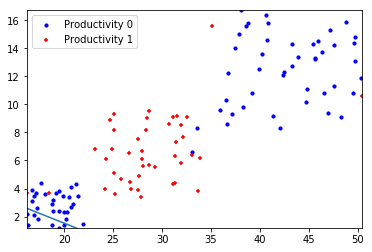

In [30]:

#Finally draw the decision boundary for this logistic regression model
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Emp_Productivity_raw.Age[Emp_Productivity_raw.Productivity==0],Emp_Productivity_raw.Experience[Emp_Productivity_raw.Productivity==0], s=10, c='b', marker="o", label='Productivity 0')
ax.scatter(Emp_Productivity_raw.Age[Emp_Productivity_raw.Productivity==1],Emp_Productivity_raw.Experience[Emp_Productivity_raw.Productivity==1], s=10, c='r', marker="+", label='Productivity 1')
plt.xlim(min(Emp_Productivity_raw.Age), max(Emp_Productivity_raw.Age))
plt.ylim(min(Emp_Productivity_raw.Experience), max(Emp_Productivity_raw.Experience))
plt.legend(loc='upper left');

x_min, x_max = ax.get_xlim()
ax.plot([0, x_max], [intercept, x_max*slope+intercept])
plt.show()

In [31]:
Emp_Productivity_raw["pred_ovr_prob"]=fitted.predict()

In [32]:
Emp_Productivity_raw.head()

Age  Experience  Productivity  Sample_Set  pred_ovr_prob
0  20.0         2.3             0           1       0.487834
1  16.2         2.2             0           1       0.506088
2  20.2         1.8             0           1       0.494859
3  18.8         1.4             0           1       0.507326
4  18.9         3.2             0           1       0.478444

In [33]:
Emp_Productivity_raw["pred"]=np.where(Emp_Productivity_raw["pred_ovr_prob"]>=0.5,1,0)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Emp_Productivity_raw["Productivity"],Emp_Productivity_raw["pred"])

0.5798319327731093

In [35]:


Emp_Productivity2=Emp_Productivity_raw[Emp_Productivity_raw.Sample_Set>1]
Emp_Productivity2.shape

(86, 6)

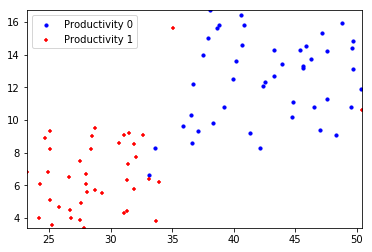

In [36]:

#frequency table of Productivity variable
Emp_Productivity2.Productivity.value_counts()

####The clasification graph
#Draw a scatter plot that shows Age on X axis and Experience on Y-axis. Try to distinguish the two classes with colors or shapes.
import matplotlib.pyplot as plt

fig = plt.figure()
ax2 = fig.add_subplot(111)

ax2.scatter(Emp_Productivity2.Age[Emp_Productivity2.Productivity==0],Emp_Productivity2.Experience[Emp_Productivity2.Productivity==0], s=10, c='b', marker="o", label='Productivity 0')
ax2.scatter(Emp_Productivity2.Age[Emp_Productivity2.Productivity==1],Emp_Productivity2.Experience[Emp_Productivity2.Productivity==1], s=10, c='r', marker="+", label='Productivity 1')
plt.xlim(min(Emp_Productivity2.Age), max(Emp_Productivity2.Age))
plt.ylim(min(Emp_Productivity2.Experience), max(Emp_Productivity2.Experience))
plt.legend(loc='upper left');
plt.show()

In [37]:

###Logistic Regerssion model1
import statsmodels.formula.api as sm
model2 = sm.logit(formula='Productivity ~ Age+Experience', data=Emp_Productivity2)
fitted2 = model2.fit(method="bfgs")
fitted2.summary()

# getting slope and intercept of the line
# getting slope and intercept of the line
slope2=fitted2.params[1]/(-fitted2.params[2])
intercept2=fitted2.params[0]/(-fitted2.params[2])

Optimization terminated successfully.
         Current function value: 0.198139
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27


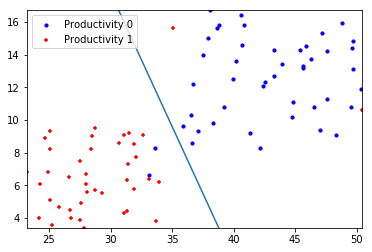

In [38]:

#Finally draw the decision boundary for this logistic regression model
import matplotlib.pyplot as plt

fig = plt.figure()
ax2 = fig.add_subplot(111)

ax2.scatter(Emp_Productivity2.Age[Emp_Productivity2.Productivity==0],Emp_Productivity2.Experience[Emp_Productivity2.Productivity==0], s=10, c='b', marker="o", label='Productivity 0')
ax2.scatter(Emp_Productivity2.Age[Emp_Productivity2.Productivity==1],Emp_Productivity2.Experience[Emp_Productivity2.Productivity==1], s=10, c='r', marker="+", label='Productivity 1')
plt.xlim(min(Emp_Productivity2.Age), max(Emp_Productivity2.Age))
plt.ylim(min(Emp_Productivity2.Experience), max(Emp_Productivity2.Experience))
plt.legend(loc='upper left');

x_min, x_max = ax2.get_xlim()
y_min,y_max=ax2.get_ylim()
ax2.plot([x_min, x_max], [x_min*slope2+intercept2, x_max*slope2+intercept2])
plt.show()


In [39]:
Emp_Productivity2["pred_prob"]=fitted2.predict()

C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
Emp_Productivity2.head()

Age  Experience  Productivity  Sample_Set  pred_ovr_prob  pred  pred_prob
33  33.9         6.2             1           2       0.368351     0   0.779984
34  29.3         5.5             1           2       0.397885     0   0.963514
35  27.8         3.4             1           2       0.436556     0   0.987692
36  30.7         8.6             1           2       0.346400     0   0.876337
37  28.4         8.2             1           2       0.361414     0   0.951406

In [41]:
Emp_Productivity2["pred_2"]=np.where(Emp_Productivity2["pred_prob"]>=0.5,1,0)

C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
accuracy_score(Emp_Productivity2["Productivity"],Emp_Productivity2["pred_2"])

0.9534883720930233

In [43]:
Emp_Productivity_raw.columns

Index(['Age', 'Experience', 'Productivity', 'Sample_Set', 'pred_ovr_prob',
       'pred'],
      dtype='object')

In [44]:
Emp_Productivity_raw=Emp_Productivity_raw.drop(['pred_ovr_prob',"pred"],axis=1)

In [45]:
Emp_Productivity_raw.head()

Age  Experience  Productivity  Sample_Set
0  20.0         2.3             0           1
1  16.2         2.2             0           1
2  20.2         1.8             0           1
3  18.8         1.4             0           1
4  18.9         3.2             0           1

In [46]:
Emp_Productivity_raw['inter1']=fitted1.predict(Emp_Productivity_raw[["Age"]+["Experience"]])
Emp_Productivity_raw['inter2']=fitted2.predict(Emp_Productivity_raw[["Age"]+["Experience"]])


In [47]:
Emp_Productivity_raw.head()

Age  Experience  Productivity  Sample_Set    inter1    inter2
0  20.0         2.3             0           1  0.114232  0.999578
1  16.2         2.2             0           1  0.040805  0.999910
2  20.2         1.8             0           1  0.092027  0.999595
3  18.8         1.4             0           1  0.051521  0.999790
4  18.9         3.2             0           1  0.139552  0.999661

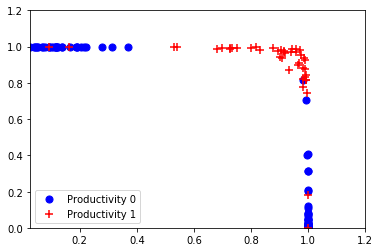

In [48]:

#plotting the new columns
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Emp_Productivity_raw.inter1[Emp_Productivity_raw.Productivity==0],Emp_Productivity_raw.inter2[Emp_Productivity_raw.Productivity==0], s=50, c='b', marker="o", label='Productivity 0')
ax.scatter(Emp_Productivity_raw.inter1[Emp_Productivity_raw.Productivity==1],Emp_Productivity_raw.inter2[Emp_Productivity_raw.Productivity==1], s=50, c='r', marker="+", label='Productivity 1')

plt.xlim(min(Emp_Productivity_raw.inter1), max(Emp_Productivity_raw.inter1)+0.2)
plt.ylim(min(Emp_Productivity_raw.inter2), max(Emp_Productivity_raw.inter2)+0.2)

plt.legend(loc='lower left');
plt.show()


In [49]:

###Logistic Regerssion model with Intermediate outputs as input
import statsmodels.formula.api as sm

model_combined = sm.logit(formula='Productivity ~ inter1+inter2', data=Emp_Productivity_raw)
fitted_combined = model_combined.fit(method="bfgs")
fitted_combined.summary()

# getting slope and intercept of the line
slope_combined=fitted_combined.params[1]/(-fitted_combined.params[2])
intercept_combined=fitted_combined.params[0]/(-fitted_combined.params[2])


Optimization terminated successfully.
         Current function value: 0.208985
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27


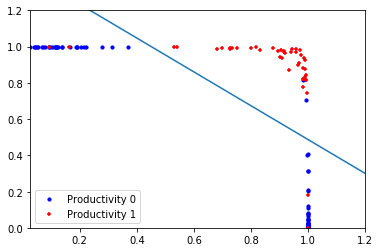

In [50]:

#Finally draw the decision boundary for this logistic regression model
import matplotlib.pyplot as plt

fig = plt.figure()
ax2 = fig.add_subplot(111)

ax2.scatter(Emp_Productivity_raw.inter1[Emp_Productivity_raw.Productivity==0],Emp_Productivity_raw.inter2[Emp_Productivity_raw.Productivity==0], s=10, c='b', marker="o", label='Productivity 0')
ax2.scatter(Emp_Productivity_raw.inter1[Emp_Productivity_raw.Productivity==1],Emp_Productivity_raw.inter2[Emp_Productivity_raw.Productivity==1], s=10, c='r', marker="+", label='Productivity 1')

plt.xlim(min(Emp_Productivity_raw.inter1), max(Emp_Productivity_raw.inter1)+0.2)
plt.ylim(min(Emp_Productivity_raw.inter2), max(Emp_Productivity_raw.inter2)+0.2)

plt.legend(loc='lower left');

x_min, x_max = ax2.get_xlim()
y_min,y_max=ax2.get_ylim()
ax2.plot([x_min, x_max], [x_min*slope_combined+intercept_combined, x_max*slope_combined+intercept_combined])
plt.show()

In [51]:
Emp_Productivity_raw["pred_prob"]=fitted_combined.predict()

In [52]:
Emp_Productivity_raw.head()

Age  Experience  Productivity  Sample_Set    inter1    inter2  pred_prob
0  20.0         2.3             0           1  0.114232  0.999578   0.062815
1  16.2         2.2             0           1  0.040805  0.999910   0.035962
2  20.2         1.8             0           1  0.092027  0.999595   0.053121
3  18.8         1.4             0           1  0.051521  0.999790   0.039025
4  18.9         3.2             0           1  0.139552  0.999661   0.075934

In [53]:
Emp_Productivity_raw["pred"]=np.where(Emp_Productivity_raw["pred_prob"]>=0.5,1,0)

In [54]:
accuracy_score(Emp_Productivity_raw["Productivity"],Emp_Productivity_raw["pred"])

0.9495798319327731

In [55]:
fitted.params

Intercept     0.447845
Age          -0.017553
Experience   -0.063240
dtype: float64

In [56]:
fitted_combined.params

Intercept   -12.213414
inter1        8.019339
inter2        8.598296
dtype: float64